<a href="https://colab.research.google.com/github/Naima-Mushfika-Naoum/Deep-Learning/blob/main/Data_Augmentation_to_Address_Overfitting_in_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Loading Dataset

Downloading flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [3]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/sample_data/Flower Dataset', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


untar=True -> unzip the data

In [4]:
data_dir

'/tmp/.keras/datasets/flower_photos'

Covert data directory in pathlib

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

Give all the images that are in jpg

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9702378513_229a96b754_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5578760521_e54aca6bed_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/14312910041_b747240d56_n.jpg')]

In [7]:
# len(list(data_dir.glob('*/*.jpg')))
# counting all the jpg images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:10]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9702378513_229a96b754_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5578760521_e54aca6bed_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/14312910041_b747240d56_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3208417632_19138d8e35_n.jpg')]

## Displaying Dataset

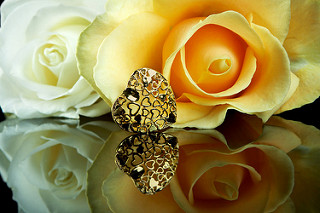

In [9]:
PIL.Image.open(str(roses[3]))

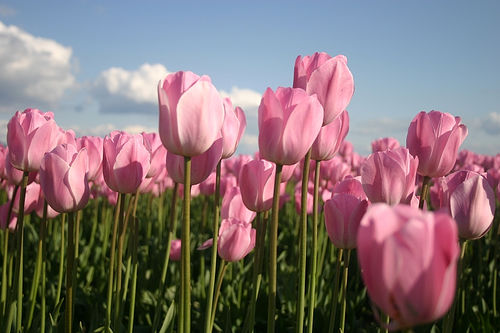

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

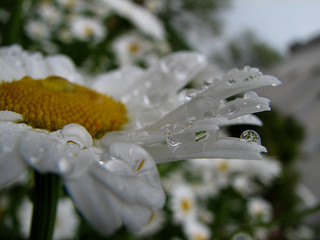

In [11]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

## Reading flowers images from disk into numpy array using opencv

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][0]

PosixPath('/tmp/.keras/datasets/flower_photos/roses/1645761726_2b1be95472.jpg')

In [15]:
# opencv accepts string path

str(flowers_images_dict['roses'][0])

'/tmp/.keras/datasets/flower_photos/roses/1645761726_2b1be95472.jpg'

In [16]:
# reading in opencv
img = cv2.imread(str(flowers_images_dict['roses'][0])) # converted into 3D array
img.shape


(333, 500, 3)

In [17]:
#resizing images
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
#iterating flowers_images_ dictionary

for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))



roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
len(X_train)

2752

In [23]:
len(X_test)

918

## Preprocessing: scale images

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
X_train_scaled[0]

array([[[0.31372549, 0.29411765, 0.29803922],
        [0.31372549, 0.29411765, 0.29803922],
        [0.31764706, 0.29803922, 0.30196078],
        ...,
        [0.49803922, 0.50196078, 0.46666667],
        [0.50196078, 0.50588235, 0.47058824],
        [0.50196078, 0.50588235, 0.47058824]],

       [[0.31764706, 0.29803922, 0.30196078],
        [0.31764706, 0.29803922, 0.30196078],
        [0.31764706, 0.29803922, 0.30196078],
        ...,
        [0.49803922, 0.50196078, 0.46666667],
        [0.50196078, 0.50588235, 0.47058824],
        [0.50196078, 0.50588235, 0.47058824]],

       [[0.32156863, 0.30196078, 0.30588235],
        [0.31764706, 0.29803922, 0.30196078],
        [0.31372549, 0.29411765, 0.29803922],
        ...,
        [0.49803922, 0.49803922, 0.47058824],
        [0.49803922, 0.49803922, 0.4745098 ],
        [0.50196078, 0.50196078, 0.4745098 ]],

       ...,

       [[0.44313725, 0.4627451 , 0.4745098 ],
        [0.50980392, 0.53333333, 0.52941176],
        [0.48627451, 0

# Building CNN network

In [26]:
num_classes = 5 #we have 5 types of flower

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), #converting into 1D since dense layer takes 1D
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # output
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 15s 21ms/step - loss: 1.3174 - accuracy: 0.4578
Epoch 2/30
86/86 [==============================] - 2s 21ms/step - loss: 1.0035 - accuracy: 0.6025
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8250 - accuracy: 0.6893
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5990 - accuracy: 0.7787
Epoch 5/30
86/86 [==============================] - 2s 20ms/step - loss: 0.4028 - accuracy: 0.8579
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2266 - accuracy: 0.9233
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.1272 - accuracy: 0.9600
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0813 - accuracy: 0.9760
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0563 - accuracy: 0.9906
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0272 - accuracy: 0.9971
Epoch 11

In [27]:
#Evaluating Model
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 21ms/step - loss: 2.5254 - accuracy: 0.6481


[2.5253818035125732, 0.6481481194496155]

Training accuracy is very hing 99.96% where testing accuracy is very low only 64.81%. So, it indicating overfittting. Let's make some predictions before we use data augmentation to address overfitting

In [28]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 10ms/step


array([[  5.017203  ,  -6.4637265 ,   0.32764   ,  -7.3149567 ,
          3.5375462 ],
       [ -4.323912  , -10.28916   ,   1.9151162 ,  -1.4414002 ,
          3.1761317 ],
       [ -4.43334   ,   2.2065308 ,  -6.685134  ,  -1.9573375 ,
          0.83963776],
       ...,
       [-13.589777  ,  -0.08700248, -13.379297  ,   7.08265   ,
         -3.466058  ],
       [  0.38803074,   0.18871978,   0.7339159 ,  -4.9848056 ,
         -4.8325753 ],
       [-19.05719   ,  -6.9438877 , -14.204839  ,  15.081959  ,
         -1.7225192 ]], dtype=float32)

In [29]:
score = tf.nn.softmax(predictions[0]) # convert numpy array to proability score
# it will be between 0 and 1
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.0845886e-01, 8.3474470e-06, 7.4303057e-03, 3.5634387e-06,
       1.8409891e-01], dtype=float32)>

In [30]:
#argmax will give the index of element which is maximum
np.argmax(score)

0

**'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4,**

In [31]:
y_test[0]

0

## Improving Test Accuracy Using Data Augmentation

In [43]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

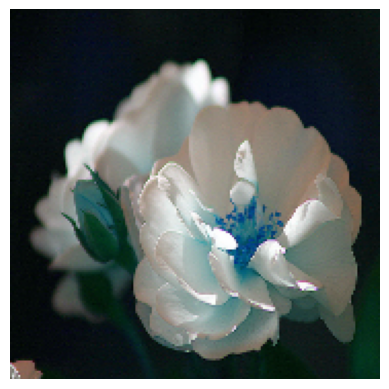

In [37]:
plt.axis('off')
plt.imshow(X[0])

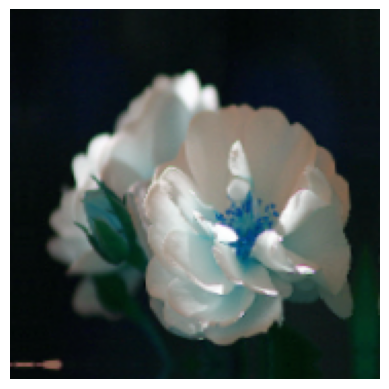

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [45]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 29ms/step - loss: 1.3631 - accuracy: 0.4092
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0652 - accuracy: 0.5738
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0024 - accuracy: 0.6097
Epoch 4/30
86/86 [==============================] - 3s 30ms/step - loss: 0.9343 - accuracy: 0.6399
Epoch 5/30
86/86 [==============================] - 3s 30ms/step - loss: 0.8605 - accuracy: 0.6621
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7968 - accuracy: 0.6900
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7535 - accuracy: 0.7111
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7035 - accuracy: 0.7267
Epoch 9/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6699 - accuracy: 0.7493
Epoch 10/30
86/86 [==============================] - 3s 30ms/step - loss: 0.6470 - accuracy: 0.7562
Epoch 11/

In [46]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 0.8540 - accuracy: 0.7462


[0.8539981245994568, 0.7461873888969421]